In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import tensorflow as tf
import requests
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import datetime
import io

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/hacks/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/hacks/test.csv")

In [ ]:
from xgboost import XGBClassifier

In [ ]:
def read_data(path, has_target):
    df = pd.read_csv(path)
    

    df_weeks = [df[df['Week'] == w].drop(columns=['Week']).set_index(['Id']) for w in range(4)]


    
    if has_target:
        df_target = df_weeks[0]['target']
        df_weeks = [df.drop(columns=['target']) for df in df_weeks]
    
    for w in range(4):
        df_weeks[w].columns = [f'{col}_w{w}' for col in df_weeks[w].columns]
    df_res = df_weeks[0].join(df_weeks[1:])
    
    if has_target:
        return df_res, df_target
    return df_res

In [ ]:
X_train, y_train = read_data('/content/drive/MyDrive/hacks/train.csv', has_target=True)
X_test           = read_data('/content/drive/MyDrive/hacks/test.csv',  has_target=False)

In [ ]:
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # just to silence the warnings
clf.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', use_label_encoder=False)

In [ ]:
y_test = clf.predict_proba(X_test)[:, 1]
res = pd.DataFrame(y_test, columns=['Predicted'])
res.index = X_test.index
res.head()

,Predicted
Id,
6107424960806386948,0.007021
-1808613790090531322,0.014067
-2649749947427248381,0.951422
4684257435812939224,0.249799
-7030158396775705152,0.030545


In [ ]:
res.to_csv('final_3.csv')

In [ ]:
from google.colab import files
files.download("final_3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Дальше не нужно...

In [ ]:
data.head(500)

In [ ]:
testing_df = pd.DataFrame(data.groupby(['Id'], as_index=False).mean())
testing_df[testing_df.V3.isnull()].index

Int64Index([   9,   15,   18,   19,   30,   35,   39,   47,   48,   52,
            ...
            7655, 7664, 7668, 7673, 7674, 7676, 7682, 7693, 7700, 7712], dtype='int64', length=1775)

In [ ]:
data = data.drop(index=data[data.V3.isnull()].index)

In [ ]:
data = data.reset_index().drop('index', axis=1)

In [ ]:
print("Number of null values in column 1 : " + str(data.iloc[:, :].isnull().sum()))

Number of null values in column 1 : Id           0
Week         0
V1          48
V2          48
V3        7100
V4        7100
V5        7100
V6        7100
V7        7100
V8        7100
V9        7100
V10       7100
V11       7100
V12       7100
V13       7100
V14       7100
V15       7100
V16       7100
V17       7100
V18       7100
V19       7100
V20       7100
V21       7100
V22       7100
P1        2914
P2        2914
P3        2913
P4        2913
P5        2914
P6        2914
P7        2914
P8        2913
P9        2913
P10       2914
P11       2914
P12       2914
P13       2914
P14       2849
P15       2914
P16       2914
P17       2913
P18       2914
P19       2913
P20       2914
P21       2913
P22       2914
P23       2913
P24       2914
P25       2913
P26       2914
P27       2914
target       0
dtype: int64


In [ ]:
columns = data.columns

In [ ]:
columns

Index(['Id', 'Week', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'target'], dtype='object')

In [ ]:
# data.loc[data['V3'].notnull()].V3.mean()
# data["V3"].notnull()

0.04619771727743493

In [ ]:
for column in columns[:-1]:
    mean = data.loc[data[column].notnull()][column].mean()
    data[column].fillna(mean, inplace=True)
    mean = test_data.loc[test_data[column].notnull()][column].mean()
    test_data[column].fillna(mean, inplace=True)

In [ ]:
# data = data.fillna(0)
# data

,Id,Week,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,target
0,-6536978109522202983,0,0.000000,0.0,0.000000,0.011364,0.006579,0.0311,0.013158,0.006579,0.228694,0.000000,0.333073,0.0,0.0,0.019737,0.064203,0.263279,0.011364,0.000000,0.0,0.000000,0.010870,0.0,86.0,24137.0,0.666667,5.205102,77.950000,21.400000,132.666667,0.000000,0.000000,0.166667,0.000000,4.82,0.000000,2440.153846,301.566667,0.500000,12.076923,11038.166667,15.400000,4.82,8.911111,200.0,0.000000,4.820000,0.333333,6712.0,0.333333,0.0
1,-6536978109522202983,1,0.000000,0.0,0.000000,0.011364,0.006579,0.0311,0.013158,0.006579,0.228694,0.000000,0.333073,0.0,0.0,0.019737,0.064203,0.263279,0.011364,0.000000,0.0,0.000000,0.010870,0.0,64.0,43316.0,0.347826,3.926019,105.650000,10.800000,154.608696,0.000000,0.000000,0.130435,0.130435,4.82,0.130435,1761.000000,487.050000,0.217391,10.518868,14078.000000,17.016667,4.82,8.292754,510.0,0.000000,4.820000,0.652174,4873.0,0.391304,0.0
2,-6536978109522202983,2,0.000000,0.0,0.000000,0.011364,0.006579,0.0311,0.013158,0.006579,0.228694,0.000000,0.333073,0.0,0.0,0.019737,0.064203,0.263279,0.011364,0.000000,0.0,0.000000,0.010870,0.0,59.0,19961.0,0.500000,3.627770,38.100000,11.766667,122.318182,0.000000,0.000000,0.181818,0.227273,4.82,0.181818,1560.333333,92.733333,0.227273,7.974747,10814.454545,41.100000,4.82,9.753030,190.0,0.000000,4.820000,0.500000,2175.0,0.181818,0.0
3,-6536978109522202983,3,0.000000,0.0,0.000000,0.011364,0.006579,0.0311,0.013158,0.006579,0.228694,0.000000,0.333073,0.0,0.0,0.019737,0.064203,0.263279,0.011364,0.000000,0.0,0.000000,0.010870,0.0,67.0,40729.0,0.473684,3.348995,86.983333,15.366667,152.368421,0.026316,0.026316,0.105263,0.105263,4.78,0.131579,2028.533333,487.016667,0.263158,17.708333,13842.052632,33.850000,4.82,10.520614,382.0,0.026316,4.814737,0.447368,4093.0,0.394737,0.0
4,-1744017237843019509,0,0.051282,1.0,0.014363,0.018308,0.037632,0.0000,0.180246,0.103449,0.379082,0.000000,0.020292,0.0,0.0,0.000000,0.000000,0.055489,0.071362,0.071817,0.0,0.047960,0.000000,0.0,47.0,56986.0,0.304348,3.916232,30.466667,5.200000,143.217391,0.000000,0.000000,0.152174,0.152174,4.86,0.347826,1960.274510,105.433333,0.108696,10.819113,10859.086957,31.866667,4.94,9.438406,777.0,0.021739,4.908478,0.673913,1296.0,0.239130,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30855,2010738301694279951,3,0.111111,2.0,0.006173,0.267642,0.000000,0.0000,0.192127,0.000000,0.018545,0.005747,0.289156,0.0,0.0,0.008333,0.019045,0.151087,0.000000,0.009259,0.0,0.023627,0.009259,0.0,51.0,27623.0,0.395062,2.587916,33.266667,7.766667,145.098765,0.037037,0.012346,0.123457,0.160494,4.96,0.234568,1196.927835,89.650000,0.135802,6.394737,10236.172840,24.100000,4.97,8.271399,406.0,0.000000,4.966790,0.555556,961.0,0.345679,0.0
30856,8802977523104348852,0,0.032258,1.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,80.0,18324.0,0.941176,2.772570,52.750000,23.716667,132.058824,0.000000,0.000000,0.176471,0.176471,4.98,0.058824,1856.666667,96.833333,0.352941,6.177024,9226.941176,19.566667,4.98,11.681373,234.0,0.000000,4.980000,0.058824,3414.0,0.235294,1.0
30857,8802977523104348852,1,0.032258,1.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,171.0,16426.0,1.000000,2.859619,69.083333,69.083333,171.000000,0.000000,0.000000,0.000000,0.000000,4.99,0.000000,1650.000000,69.083333,0.000000,2.859619,16426.000000,9.616667,4.99,9.616667,171.0,0.000000,4.990000,0.000000,16426.0,1.000000,1.0
30858,8802977523104348852,2,0.032258,1.0,0.000000,0.000000,0.000000,0.000

In [ ]:
y = data.target
X = data.drop(["Id", "Week", "target"], axis=1)


In [ ]:
X = np.array(X)

In [ ]:
X.shape

(23760, 49)

In [ ]:
X = X.reshape(int(X.shape[0]/4), 4, 49)

In [ ]:
real_y = []
for i in range(0, len(y), 4):
    real_y.append(y[i])

In [ ]:
y = np.array(real_y)

In [ ]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)

In [ ]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(144, activation='tanh', return_sequences=True, input_shape=(4, X_train.shape[2])),
    tf.keras.layers.GRU(86, activation='tanh', return_sequences=True),
    tf.keras.layers.GRU(86, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta = 0.0001,
    patience = 15,
    restore_best_weights = True
)

history = model.fit(X_train, y_train, validation_split=0.3, callbacks=[early_stopping], epochs=1000, verbose=2)

Epoch 1/1000
104/104 - 7s - loss: 0.5451 - accuracy: 0.9152 - val_loss: 0.4741 - val_accuracy: 0.9004 - 7s/epoch - 64ms/step
Epoch 2/1000
104/104 - 1s - loss: 0.4085 - accuracy: 0.9158 - val_loss: 0.3670 - val_accuracy: 0.9004 - 858ms/epoch - 8ms/step
Epoch 3/1000
104/104 - 1s - loss: 0.3240 - accuracy: 0.9158 - val_loss: 0.3166 - val_accuracy: 0.9004 - 817ms/epoch - 8ms/step
Epoch 4/1000
104/104 - 1s - loss: 0.2848 - accuracy: 0.9158 - val_loss: 0.2951 - val_accuracy: 0.9004 - 811ms/epoch - 8ms/step
Epoch 5/1000
104/104 - 1s - loss: 0.2637 - accuracy: 0.9158 - val_loss: 0.2846 - val_accuracy: 0.9004 - 814ms/epoch - 8ms/step
Epoch 6/1000
104/104 - 1s - loss: 0.2505 - accuracy: 0.9158 - val_loss: 0.2759 - val_accuracy: 0.9004 - 821ms/epoch - 8ms/step
Epoch 7/1000
104/104 - 1s - loss: 0.2401 - accuracy: 0.9158 - val_loss: 0.2676 - val_accuracy: 0.9004 - 814ms/epoch - 8ms/step
Epoch 8/1000
104/104 - 1s - loss: 0.2325 - accuracy: 0.9158 - val_loss: 0.2589 - val_accuracy: 0.9004 - 810ms/epo

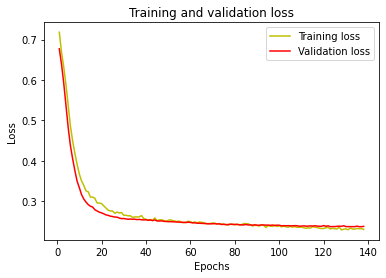

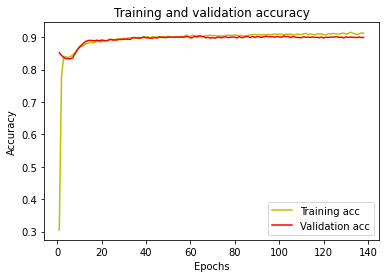

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, 'y', label = "Training acc")
plt.plot(epochs, val_acc, 'r', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_predicted = model.predict(X_test)
print("Confusion matrix for our model is: \n", confusion_matrix(y_test, y_predicted.round()))
print("Score of our model is: ", model.evaluate(X_test, y_test))

Confusion matrix for our model is: 
 [[1232   37]
 [ 107  167]]
49/49 [==============================] - 0s 4ms/step - loss: 0.2366 - accuracy: 0.9067
Score of our model is:  [0.2366122156381607, 0.9066752791404724]


On whole data

In [ ]:
y = np.asarray(y).astype('float32').reshape((-1,1))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(144, activation='tanh', return_sequences=True, input_shape=(4, X_train.shape[2])),
    tf.keras.layers.GRU(86, activation='tanh', return_sequences=True),
    tf.keras.layers.GRU(86, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta = 0.0001,
    patience = 25,
    restore_best_weights = True
)

history = model.fit(X, y, validation_split=0.3, callbacks=[early_stopping], epochs=1000, verbose=2)

Epoch 1/1000
130/130 - 7s - loss: 0.6355 - accuracy: 0.7227 - val_loss: 0.5323 - val_accuracy: 0.9169 - 7s/epoch - 54ms/step
Epoch 2/1000
130/130 - 1s - loss: 0.4767 - accuracy: 0.9117 - val_loss: 0.3978 - val_accuracy: 0.9169 - 1s/epoch - 8ms/step
Epoch 3/1000
130/130 - 1s - loss: 0.3762 - accuracy: 0.9110 - val_loss: 0.3201 - val_accuracy: 0.9169 - 1s/epoch - 8ms/step
Epoch 4/1000
130/130 - 1s - loss: 0.3121 - accuracy: 0.9110 - val_loss: 0.2680 - val_accuracy: 0.9169 - 1s/epoch - 8ms/step
Epoch 5/1000
130/130 - 1s - loss: 0.2758 - accuracy: 0.9110 - val_loss: 0.2408 - val_accuracy: 0.9169 - 1s/epoch - 9ms/step
Epoch 6/1000
130/130 - 1s - loss: 0.2554 - accuracy: 0.9110 - val_loss: 0.2235 - val_accuracy: 0.9169 - 1s/epoch - 8ms/step
Epoch 7/1000
130/130 - 1s - loss: 0.2383 - accuracy: 0.9110 - val_loss: 0.2095 - val_accuracy: 0.9169 - 1s/epoch - 8ms/step
Epoch 8/1000
130/130 - 1s - loss: 0.2279 - accuracy: 0.9127 - val_loss: 0.1968 - val_accuracy: 0.9237 - 1s/epoch - 8ms/step
Epoch 9

In [ ]:
X_final = test_data.drop(["Week"], axis=1)

In [ ]:
ids = []
for i in range(0, len(X_final), 4):
    ids.append(str(X_final.Id[i]))

In [ ]:
X_final = X_final.drop(["Id"], axis=1)

In [ ]:
X_final = np.array(X_final)
X_final = X_final.reshape(int(X_final.shape[0]/4), 4, 49)

In [ ]:
prediction = model.predict(X_final).round()
prediction = prediction.reshape(int(prediction.shape[0]))

In [ ]:
final = pd.DataFrame(data={"Id": ids, "Predicted": prediction})

In [ ]:
final.Predicted.value_counts()

0.0    3108
1.0     199
Name: Predicted, dtype: int64

In [ ]:
final.Predicted.unique()

array([0., 1.], dtype=float32)

In [ ]:
final.to_csv("/content/drive/MyDrive/hacks/final.csv", index=False)

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/hacks/final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final = final.fillna(0)

In [ ]:
final.Predicted.value_counts()

0.0    3195
1.0     112
Name: Predicted, dtype: int64